In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('heart.csv')

<h2> What proportion of people with heart failure have chest pain? </h2>

<Axes: xlabel='HeartDisease'>

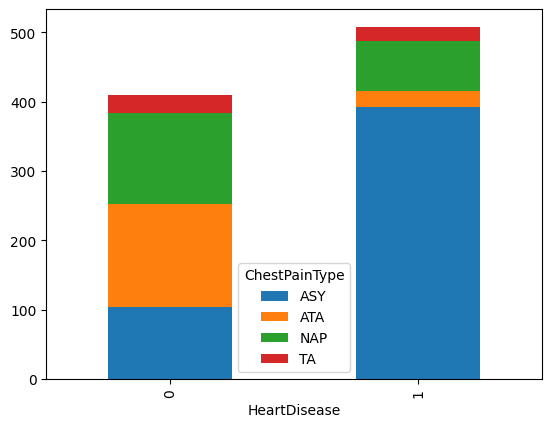

In [3]:
df.groupby('HeartDisease')['ChestPainType'].value_counts().unstack().plot(kind='bar', stacked=True)

In [4]:
def see(type):
    if type == 'ATA':
        return 'pain'
    elif type == 'NAP':
        return 'pain'
    elif type == 'ASY':
        return 'no pain'
    elif type == 'TA':
        return 'pain'

In [5]:
df['pain'] = df['ChestPainType'].apply(see)

<Axes: xlabel='HeartDisease'>

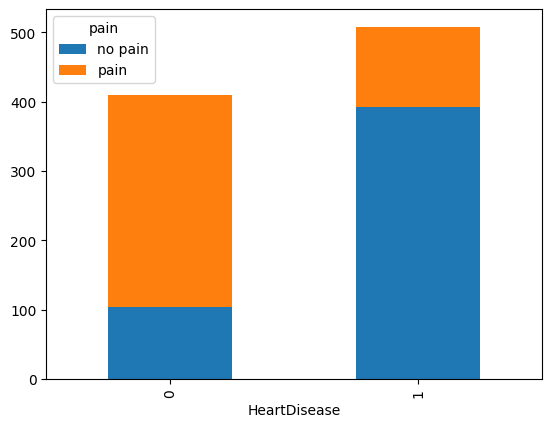

In [6]:
df.groupby('HeartDisease')['pain'].value_counts().unstack().plot(kind='bar', stacked=True)

In [9]:
<h2> What proportion of people with heart failure have chest pain? </h2>

SyntaxError: invalid syntax (3962638481.py, line 1)

In [10]:
ppl_chest_pain = df[df['HeartDisease'] == 1]

In [11]:
ppl_chest_pain['pain'].value_counts()['pain'] / ppl_chest_pain['pain'].value_counts().sum()

0.2283464566929134

In [12]:
import pandas as pd
import scipy.stats as stats

# Contingency table for heart failure vs chest pain
contingency_table = pd.crosstab(df['HeartDisease'], df['pain'])

# Perform Chi-square test
chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi2 Stat: {chi2_stat}, p-value: {p_val}")

Chi2 Stat: 243.02113844518294, p-value: 8.629373889117524e-55


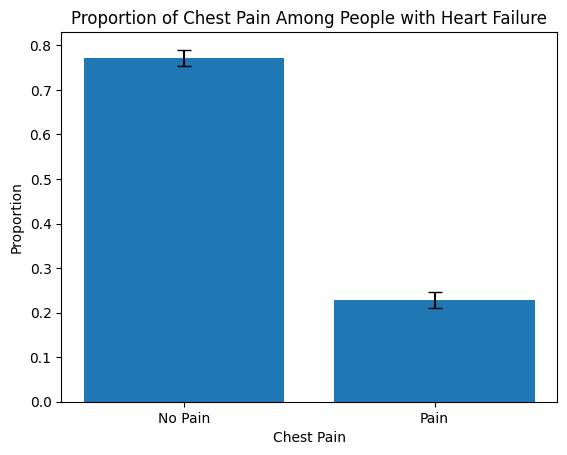

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate proportions of chest pain (1) vs no chest pain (0)
pain_counts = ppl_chest_pain['pain'].value_counts(normalize=True)

# Create a bar plot
fig, ax = plt.subplots()

ax.bar(pain_counts.index, pain_counts.values, yerr=np.sqrt(pain_counts.values * (1 - pain_counts.values) / len(ppl_chest_pain)), capsize=5)
ax.set_xlabel('Chest Pain')
ax.set_ylabel('Proportion')
ax.set_title('Proportion of Chest Pain Among People with Heart Failure')
ax.set_xticks([0, 1])
ax.set_xticklabels(['No Pain', 'Pain'])
plt.show()

